### 정상성 (定常性, Stationarity = 일관된)
- 일정해서 늘 한결같은 성질을 뜻한다.'  
  <sub>*常(상) = 항상 상 =  항상 같다 = 상수 = 한결 같은 성질</sub>
  
- 관측된 시간에 무관하게 과거, 현재, 미래의 분포가 같아야 한다.
- 평균, 분산 등이 변하지 않으며 추세나 계절성이 없는 시계열 데이터이다.
- 하지만, 정상성을 나타내는 시계열은 장기적으로 볼 때 예측할 수 있는 패턴을 나타내지 않아야 한다. 즉, 불규칙 해야한다.  
- 즉, 어떤 특정한 주기로 반복하는 계절성이나 위로, 아래로 가능 추세성이 없어야 한다.  
  <sub>*패턴이 있으면 안되고 일관된 분포를 지닌 정상성을 띄고 있어야 예측이 가능하다.  
  *평균과 분산이 변하지 않는다는 것은 추세나 계절성이 없다는 것이고 우연변동도 정상성을 무조건 가지고 있지 않기 때문에 검사해야 한다.  
  *정상성은 늘 같다는 것이며 분포나 분산이 항상 일정하고 똑같아야 한다. 예측할 수 있는 패턴이 나오면 안되고 추세나 계절이 없어야 한다.</sub>

<img src="./images/stationary.png"> 

- 정상성 = b, g
- 계절성 = d, h (주기가 있어야하며, 주기별로 변동)
- 추세 = a, c, e, f
- 계절-추세 = i

### 라그 (Lag)
- 라그(시차)는 현재 시점에서 이전 시점의 값을 의미하며, 특정 시점 t에서의 라그는 t-k에서의 값을 가리킨다.  
  <sub>*데이터 프레임이 일별인지 연별인지 모를 때 이전시점을 가르키기 위해서 단위를 **라그**로 통용한 것이다.  
  *라그를 2로 줬을 때, 2일이거나 2개월 또는 2년일 수 있다. 이전 시점을 보고 다음을 예측하는 것이다.</sub>
  
- 시계열 데이터에서 패턴과 트렌드를 분석하고 예측하는 데 중요한 개념이다.
  
- 예를 들어, 하루 전의 주식 가격을 이용하여 다음 날의 주식 가격을 예측하는 등의 분석에 사용될 수 있다.  
<sub>*라그는 이전 시점을 가르키고 이전 시점 값을 확인할 수 있으니 패턴을 보고 예측까지 할 수 있다.    
*예시로 A 펀드가 있다고 가정하자. 이 A 펀드의 주가가 어떻게 될지 예측하고 싶다면, 전날의 마감을 보고 다음날을 예측할 수 있다.  
내가 라그를 어떻게 설정하느냐에 따라 다음날, 다음 주, 또는 내년까지도 예측이 가능하다. 이때 필요한 용어가 라그(lag)다.  
라그는 시간 시계열 데이터에서 특정 시점의 값이 이전 시점의 값과 어떤 관계가 있는지를 나타내는 데 사용된다.
</sub>

### 차분 (Differencing)
- 연이은 관측값들의 차이를 계산해준다.
- 시계열 데이터의 평균과 분산이 일정해야 시계열 값을 예측할 수 있다.
- 정상성을 나타내지 않는 시계열에서 정상성을 나타내도록 만드는 방법 중 가장 대표적인 방법이다.  
  <sub>*차분은 뺄셈이며, 차분 시 정상성이 나타난다. 즉, 차분의 목적은 정상성이다.  
  *차분을 통해 정상성을 만들면 예측이 쉬워지고, 예측한 결과 값은 차분된 값이기 때문에 기존에 있었던 값에 더해줘 원래대로 되돌리면 된다.  
  *라그된 데이터=이전 데이터, 예측된 데이터=미래</sub>
  
- 차분을 통해 추세나 계절성을 제거하거나 감소시킬 수 있다.
- 라그를 사용하여 시계열 데이터를 분석할 때, 라그된 데이터 사이의 차이를 계산하여 차분을 수행한다.  
<sub>*예를 들어 아이스크림 사업을 한다고 가정하자. 아이스크림의 물량을 얼만큼 확보해야 할지 모를 때, 어제의 판매량을 본다고 정확하게 준비할 수 있는 것이 아니다.  
주식은 전날을 봐야하지만, 아이스크림 등 물품을 판매할 때는 어제의 판매량만 보면 너무 일부분만 보게 된다.  
따라서, 일주일 전, 한달 전, 작년 등을 라그를 사용하여 보는 것이 맞다.</sub>

In [1]:
# yfinance: Yahoo Finance 데이터를 Python에 가져와 사용할 수 있게 하는 라이브러리
import yfinance as yf

# 라이브러리를 사용 하여 특정 주식 데이터 다운로드 후 데이터 프레임으로 변환
# ticker(티커): 주식 이름 또는 종목 전달 (GOOG, AAPL 등...)
# start=시작일, end=종료일(미전달 시 현 시점까지 가져옴)
google_stock_df = yf.download('GOOG', start='2014-05-01')
google_stock_df

# 날짜를 보고 라그의 필요성을 느껴야함
# 3일 전꺼하면 행을 3개전껄로 해버리는 사람이 있을 수 있기 때문에 3라그해서 3개 행 전으로 본다

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-01,26.283339,26.573542,26.122280,26.494759,26.464643,38110345
2014-05-02,26.614929,26.626896,26.208544,26.324226,26.294304,33770463
2014-05-05,26.169153,26.372595,25.994633,26.318243,26.288328,20482080
2014-05-06,26.189596,26.268379,25.682489,25.686478,25.657280,33780490
2014-05-07,25.718889,25.763268,25.096100,25.428186,25.399282,64486563
...,...,...,...,...,...,...
2024-06-05,176.535004,177.970001,175.289993,177.070007,176.868744,15233900
2024-06-06,177.429993,178.710007,177.210007,178.350006,178.147278,14255800
2024-06-07,178.460007,179.419998,175.789993,175.949997,175.750000,14716300


In [2]:
# 데이터 프레임의 Adj Close만 가져와 단변량 시계열 데이터로 변환
# Adj Close: 종가
google_stock_df = google_stock_df['Adj Close']
google_stock_df

# 2014-05-01에 1라그 시 이전 값이 없어서 NaN
# 2014-05-02애 2라그해도 이전 값이 없어서 NaN
# 단, 2014-05-02에 1라그 시 2014-05-01의 26.494759 값이 가져와진다.

Date
2014-05-01     26.464643
2014-05-02     26.294304
2014-05-05     26.288328
2014-05-06     25.657280
2014-05-07     25.399282
                 ...    
2024-06-05    176.868744
2024-06-06    178.147278
2024-06-07    175.750000
2024-06-10    176.630005
2024-06-11    175.770004
Name: Adj Close, Length: 2546, dtype: float64

- **.diff(2)**: 원본 데이터에 대해 2번째 라그 차분을 계산.  
  현재 시점과 2번 이전의 값을 비교하여 차이 계산  
  2014-05-05에 2014-05-01 값 빼주기

- **.diff().diff()**: 원본 데이터에 1라그 차분 진행 후, 다시 한번 라그 차분 계산.  
  현재 시점과 이전 시점의 차이를 계산하고 그 결과에 대해 다시 한 번 차이 계산.  
  즉, 2014-05-05 기준으로 2014-05-02 값 빼주고 결과 값에 2014-05-02 값을 한 번 더 빼주기

In [3]:
# 연이은 관측값들의 차이를 계산한다(변화량).
# diff(): 차분 계산 메서드, 현재 값과 이전 값의 차이를 계산
google_stock_df.diff()

Date
2014-05-01         NaN
2014-05-02   -0.170340
2014-05-05   -0.005976
2014-05-06   -0.631048
2014-05-07   -0.257998
                ...   
2024-06-05    1.937805
2024-06-06    1.278534
2024-06-07   -2.397278
2024-06-10    0.880005
2024-06-11   -0.860001
Name: Adj Close, Length: 2546, dtype: float64

In [4]:
# 연이은 관측값들의 차이를 비율로 계산한다(변화율).
# pct_change(): 이전 값과 현재 값 사이의 백분율 변화를 계산하는 데 사용
google_stock_df.pct_change()

Date
2014-05-01         NaN
2014-05-02   -0.006436
2014-05-05   -0.000227
2014-05-06   -0.024005
2014-05-07   -0.010056
                ...   
2024-06-05    0.011078
2024-06-06    0.007229
2024-06-07   -0.013457
2024-06-10    0.005007
2024-06-11   -0.004869
Name: Adj Close, Length: 2546, dtype: float64

*차분을 통한 정상성은 시계열 데이터의 변화를 살펴보는 과정으로, 현재 시점과 이전 시점의 데이터 간 차이를 계산하여 데이터의 변화량을 파악합니다.  
이를 통해 데이터의 추세나 계절성과 같은 비정상성을 제거하고, 데이터를 안정성을 가진 형태로 변환합니다.  
이렇게 변환된 정상성 시계열은 통계적 분석이나 예측에 용이하며, 데이터의 평균과 분산이 일정한 패턴을 보입니다.

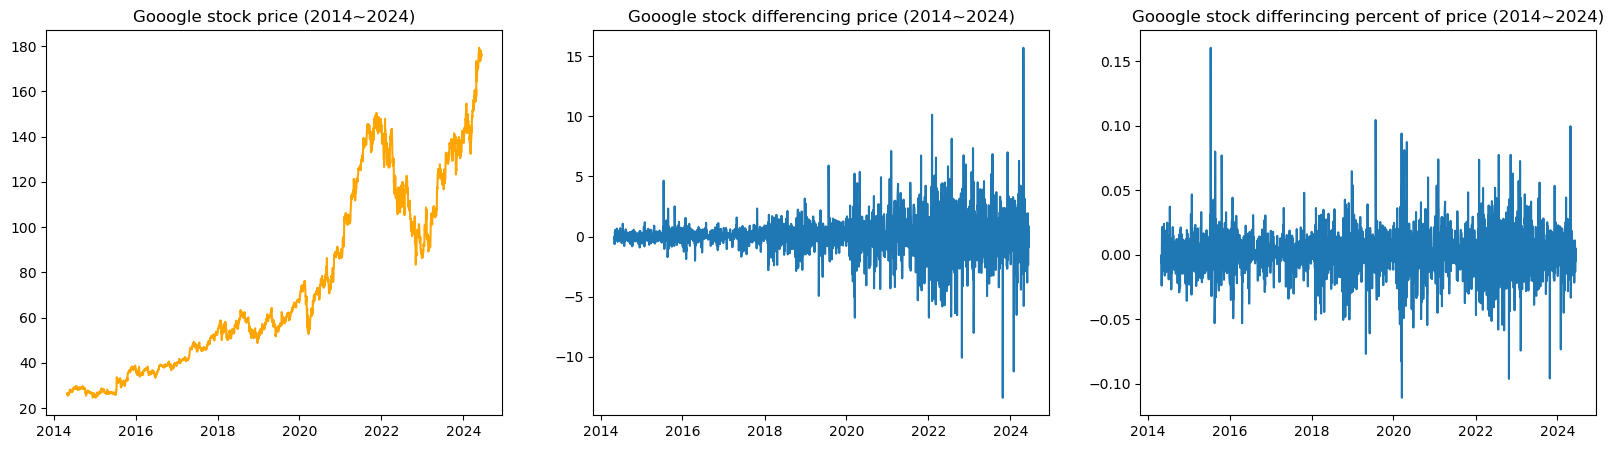

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))


# 원본 데이터, 정상성 없음
plt.subplot(1, 3, 1) # 1행, 3열, 1(열번호)
plt.plot(google_stock_df, c='orange')
plt.title('Gooogle stock price (2014~2024)')

# 차분 데이터
plt.subplot(1, 3, 2)
plt.plot(google_stock_df.diff())
plt.title('Gooogle stock differencing price (2014~2024)')

# 차분 후 백분율 변환
plt.subplot(1, 3, 3)
plt.plot(google_stock_df.pct_change())
plt.title('Gooogle stock differincing percent of price (2014~2024)')

plt.show()

- 첫번째의 경우 오름 추세가 보임

- 두번째는 차분한 그래프로 정상성이 나타남(변화량)  
  평균과 분산이 일정해야 하지만, 차분만 진행 시 평균과 분산이 일정하지 않기 때문에 백분율 변환이 필요함
  
- 세번째는 백분율 변환한 그래프로 추세가 없고 계절성도 없음(변화율)

- 해당 그래프로 라그를 통해 정상성이 생긴 것을 확인할 수 있음

### 자기상관 함수(Autocorrelation Function, ACF)
- 자기상관이란, 현재 시점에서 이전 시점 간의 관련성을 뜻한다.

- 시간 흐름에 따라 각 데이터는 독립적이지 않다. 전일 데이터가 금일 데이터에 영향을 주고, 익일 데이터는 금일 데이터의 영향을 받는다.

- 시계열의 라그 사이의 선형 관계를 측정해서 시계열 자료의 정상성을 파악할 때 사용한다.

- ACF 그래프는 정상 시계열일 경우 모든 시차에서 0에 근접한 모양을 나타내고,  
  비정상 시계열은 천천히 감소할 경우 추세, 물결 모양일 경우 계절이다.  
<sub>*설정한 시차에 따라 각각의 시차에 대한 자기상관계수를 계산하게 되고 시차가 증가함에 따라 자기상관계수가 지속적으로 감소한다면,  
시계열 데이터가 정상성(stationarity)을가지고 있다고 볼 수 있다.</sub>

<img src="./images/acf.jpg" style="margin-left: 20px;">

<sub>*왼쪽 비정상 시계열, 오른쪽 정상 시계열  
*비정상 시계열을 차분을 통해 정상 시계열로 만든 것이다.  
*왼쪽 이미지는 라그가 증가함에 따라 값이 소폭 감소하는 경향을 보이고 정상성을 가지고 있을 수 있다.</sub>

Text(0.5, 1.0, 'Stationary Autocorrelation Function')

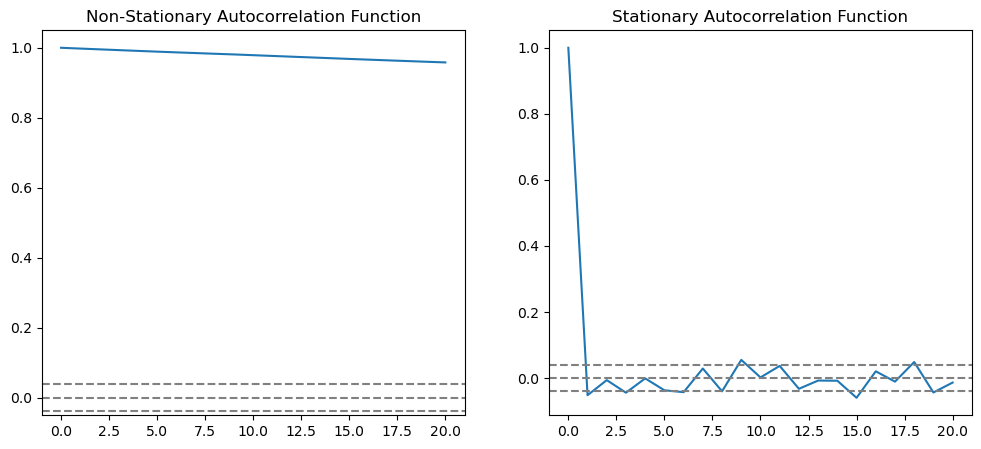

In [6]:
import numpy as np
from statsmodels.tsa.stattools import acf

# NaN 값 제거
google_stock_df.dropna(inplace=True)
# 차분 후 NaN 값 제거
google_stock_diff_df = google_stock_df.diff().dropna()

# acf(자기상관계수) 계산
# nlags: 라그 값 지정(라그 값 이전까지 상관관계 분석)
google_stock_acf = acf(google_stock_df, nlags=20)
google_stock_diff_acf = acf(google_stock_diff_df, nlags=20)

# 그래프 크기 지정
plt.figure(figsize=(12, 5))

# 정상성이 없는 원본 데이터 acf
plt.subplot(121) # (1, 2, 1을 121로 작성 가능)
plt.plot(google_stock_acf)
# 수평선 (y가 0인 시점에 수평선 그리기)
# 수평선을 3개 그리는 이유는 값이 정규 분포 영역 안에 들어가는지 확인 필요 (-1.96~1.96)
# 즉, 이상치가 아닌지 확인하며, 영역 안에 해당 시 정ㅇ상성을 띈다고 판단이 가능
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(google_stock_df)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(google_stock_df)), linestyle='--', color='gray')
plt.title('Non-Stationary Autocorrelation Function')

# 차분을 통해 정상성이 나타내는 데이터 acf
plt.subplot(122)
plt.plot(google_stock_diff_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(google_stock_diff_df)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(google_stock_diff_df)), linestyle='--', color='gray')
plt.title('Stationary Autocorrelation Function')

- 오른쪽 그래프와 같이 영역(점선) 안에 데이터가 들어오면 평균과 분산이 일정하다고 불 수 있다.
- 만약, 차분을 진행했어도 영역밖으로 나오게 된다면 2차 차분을 진행하고 해당 그래프로 차분을 얼마나 해야 하는지 알 수 있다.

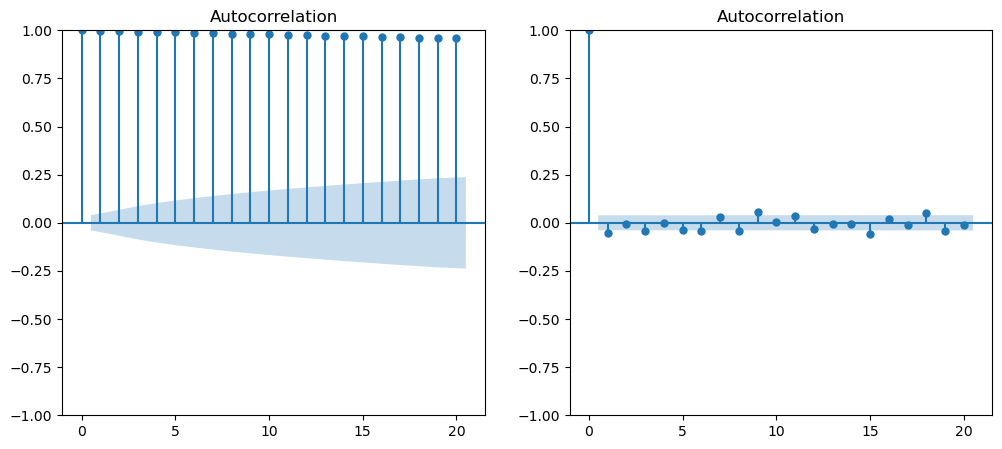

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

# 그래프 크기 지정
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 원본 데이터 자기상관계수(ACF) 계산 및 그래프 생성
plot_acf(google_stock_df, lags=20, ax=ax[0])
# 차분된 데이터 자기상관계수(ACF) 계산 및 그래프 생성
plot_acf(google_stock_diff_df, lags=20, ax=ax[1])

plt.show()

### 부분자기상관 함수 (Partial ACF, PACF)
- 다른 시차의 영향을 제거한 후에 나타나는 자기상관을 보여준다.
- 해당 시점과 주어진 시차 사이의 관계를 확인할 때, 중간에 있는 시차들의 영향을 배제한다.
- 현재 시점을 기준으로 lag를 설정하면, 전날과의 차이를 계속 구해 나가는 것이 아니라 전전날, 전전전날 등 부분적으로 영향을 주는 시차를 확인할 수 있다.
- 이 때, 다른 시차의 영향을 제거하고 해당 시차와의 상관관계만 측정한다.  
<sub>*PACF는 ACF같이 전날의 차이를 계속해서 더하는 게 아닌(누적이 아닌) 부분적으로 딱 한 부분과 자기 상관을 보여준다.</sub>

- PACF를 통해 데이터의 직접적인 상관관계를 파악하는 것은 유용하지만, 정상 시계열과 비정상 시계열을 구분하는 데에 활용하기 어렵다.  
<sub>*ACF는 2라그로 설정해도 1라그 단위로 이동하는데, PACF는 정확하게 2라그로 이동한다.  
*PCAF 사용 시 차분할 필요가 없다.</sub>

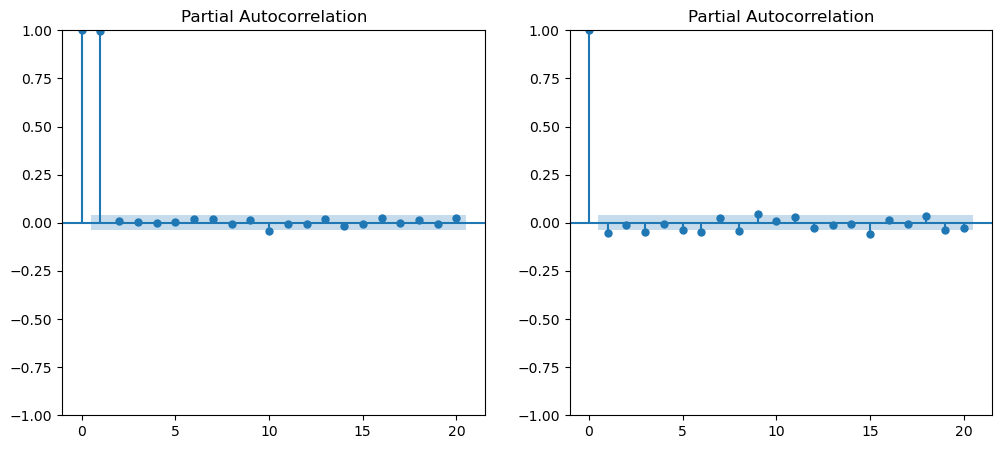

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf

# 그래프 크기 지정
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 원본 데이터에 대한 부분자기상관계수(PACF) 계산 및 그래프 생성
plot_pacf(google_stock_df, lags=20, ax=ax[0])
# 차분된 데이터에 대한 부분자기상관계수(PACF) 계산 및 그래프 생성
plot_pacf(google_stock_diff_df, lags=20, ax=ax[1])

plt.show()

### ACF와 PACF
1. ACF

> <img src='./images/acf.png'>
>
> - 시차에 대한 항들이 **누적**된다
> - 현재 시점으로 부터 정확히 이전 lag와의 상관관계를 측정하는 것이다.  
> <sub>ACF는 1라그로 이동한다(2라그 불가).</sub>
> - 시계열 데이터의 전반적인 패턴을 파악해서 **추세나 주기성 등 다양한 특성을 확인**할 수 있다.
> - 차분을 통해 정상 시계열로 변환한 뒤 ACF를 구하면(오른쪽 그래프), 정상성을 가진 시계열에서의 자기상관을 파악할 수 있다.  
> <sub>*데이터가 정상인지 비정상인지 확인 가능</sub>
> - 온라인 판매 플랫폼에서 전날 방문자 수와 현재 방문자 수 간의 자기 상관관계를 확인함으로써, 마케팅 활동이나 프로모션 등의 변화가 방문자 수에 미치는 영향을 이해할 수 있게 된다.

2. PACF

> <img src='./images/pacf.png'>
>
> - 특정 시차의 영향을 반복적으로 제거한다(**독립적**).
> - 이전 lag와의 상관관계뿐만 아니라 훨씬 이전의 시차와의 상관관계도 측정할 수 있다.
> - 직접적인 상관관계를 파악하는 데 유용하고, 특정 시차에 대한 자기상관을 직접적으로 보여준다.
> - 이를 통해 어떤 시점(k)이 다른 시점(k-t)에 미치는 가에 대한 영향력을 파악하는 데 용이하다.
> - 이미 정상성을 가진 데이터라면, 차분 없이 PACF를 사용하여 직접적인 상관관계를 파악하는 것이 더 효율적일 수 있다.
> - 주식 시장에서 주가 예측 모델을 구축하는 경우, 특정 시점의 주기와 한 달 전의 주가 간의 직접적인 상관관계를 확인함으로써 한 달 전의 주가 변동이 현재 주가에 미치는 영향을 파악할 수 있게 된다.
> <sub>*한마디로, 오늘이랑 어제 중 어떤 날짜가 더 관계가 있는지 보고 싶어 각각인 PACF를 본다고 생각하면 된다(중간 개입 X).</sub>

<br>

<sub>*첫번째 시각화는 ACF를 먼저 진행한다.  
ACF로 이저 시점의 데이터와 현재 데이터가 얼마나 상관이 있는지 상관관계를 확인해야 한다(라그 사용 때 도움됨).  
시각화한 데이터가 정상성을 나타내면 0에 가까워지는데 정상 시계열로 볼 수 있다.  
정상시계열이 맞다면, PACF를 시각화하여 PACF 그래프를 보고 상관관계를 확인하며 분석한다.  
즉, PAF는 정상인지 비정상인지 구분이 불가하기 때문에 ACF로 먼저 정상인지 확인하고 PACF로 넘어간다.  
ACF 그래프가 정상이면 차분 없이 비정상이라면 차분 후 진행하면 된다.</sub>

- ACF(자기상관함수): 시계열 데이터의 모든 라그에서 상관관계를 누적적으로 계산하여, 추세와 패턴을 확인.  
  비정상 시계열은 차분을 통해 정상 시계열로 변환할 수 있으며, 정상 시계열일 경우 차분할 필요가 없음.
- PACF(부분 자기상관함수): 정상 시계열에서 각 시차에서의 직접적인 상관관계를 계산.  
  비정상 시계열의 경우 차분을 통해 정상 시계열로 변환한 후 PACF를 사용하여 분석함.